<span style="font-size:22px; font-weight:700">Model Import</span>

In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

n = pypsa.Network()
n.import_from_netcdf(path="../FYP-TZ-APG-Hydrogen-Integration/TZ-APG v1/tz-apg-v1_scenario-regi.nc")

INFO:pypsa.network.io:New version 1.0.2 available! (Current: 0.35.2)
INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


In [2]:
# print(n.buses.index)
# print(n.storage_units.index)
# print(n.loads.index)
# print(n.buses[['carrier']])

In [3]:
# print(n.carriers)

In [ ]:
# # User inputs
# start_year = 2023
# start_week = 1
# period_length_weeks = 52  # how many weeks to include

# # Get all snapshots for the chosen year
# year_snapshots = [s for s in n.snapshots if s[0] == start_year]

# # Filter snapshots within the chosen period
# selected_snapshots = []
# for s in year_snapshots:
#     timestamp = pd.to_datetime(s[1])
#     week_number = timestamp.isocalendar()[1]
#     if start_week <= week_number < start_week + period_length_weeks:
#         selected_snapshots.append(s)

# # Set the filtered snapshots
# n.set_snapshots(pd.MultiIndex.from_tuples(selected_snapshots, names=['period', 'snapshot']))

n.optimize(n.snapshots[::24])  
# n.statistics.supply(comps=["Generator"]).droplevel(0).div(1e3).plot.bar(
#     title="Generator in GWh"
# )

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 9/9 [00:00<00:00, 20.00it/s]
INFO:linopy.io: Writing time: 5.01s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 282123 primals, 936836 duals
Objective: 6.62e+09
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Link-fix-p-lower, Link-fix-p-upper, Link-ext-p-lower, Link-ext-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were 

In [ ]:
n.statistics.capex()

period                                          2023          2035
component   carrier       bus_carrier                             
Generator   Backstop      Transmission           NaN           NaN
            Bioenergy     Transmission           NaN           NaN
            Biomass       Transmission  1.169482e+07  1.370538e+07
            Coal          Transmission  1.451064e+08  3.199559e+08
            Gas           Transmission  5.741921e+07  3.267607e+08
            Geothermal    Transmission  1.766454e+07  1.565712e+07
            Hydro         Transmission  2.756998e+08  3.171267e+08
            Offshore Wind Transmission  9.411772e+06  9.411147e+06
            Oil           Transmission           NaN  1.711706e+04
            Onshore Wind  Transmission  2.782746e+07  2.782501e+07
            Solar         Transmission  1.363495e+07  1.363157e+07
Link        Transmission  Transmission -4.009358e+06 -3.913679e+06
Load        -             Transmission -5.527006e+08 -1.035270e+09
StorageUnit Battery       Transmission -1.749083e+06 -4.907105e+06

In [6]:
# # Create a summary DataFrame for generators
# gen_summary = pd.DataFrame({
#     'carrier': n.generators['carrier'],
#     'existing_capacity_MW': n.generators['p_nom'],
#     'optimized_capacity_MW': n.generators['p_nom_opt'],
# })

# # Calculate the added (new) capacity
# gen_summary['added_capacity_MW'] = gen_summary['optimized_capacity_MW'] - gen_summary['existing_capacity_MW']

# # Display the table
# from IPython.display import display
# # Show all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

# # Now display the full table
# display(gen_summary)

In [7]:
# # Get generator supply time series (entire timeframe)
# df = n.statistics.supply(comps=["Generator"], aggregate_time=False).droplevel(0).div(1e3)

# # Extract timestamps from MultiIndex columns if necessary
# if isinstance(df.columns[0], tuple):
#     timestamps = [col[1] for col in df.columns]  # second element is the timestamp
# else:
#     timestamps = df.columns

# # Plot
# fig, ax = plt.subplots(figsize=(12, 6))
# df.T.plot.area(title="Generation in GW", ax=ax, legend=False, linewidth=0)

# # Format x-axis labels
# num_snapshots = len(timestamps)
# step = max(1, num_snapshots // 10)  # show ~10 evenly spaced ticks

# def format_timestamp(ts):
#     try:
#         return ts.strftime("%Y/%m/%d, %#I%p").lower()  # works on Windows
#     except ValueError:
#         return ts.strftime("%Y/%m/%d, %-I%p").lower()  # fallback for Unix

# ax.set_xticks(range(0, num_snapshots, step))
# ax.set_xticklabels(
#     [format_timestamp(ts) for ts in timestamps[::step]],
#     rotation=45, ha='right'
# )

# # Legend
# ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
# plt.tight_layout()
# plt.show()


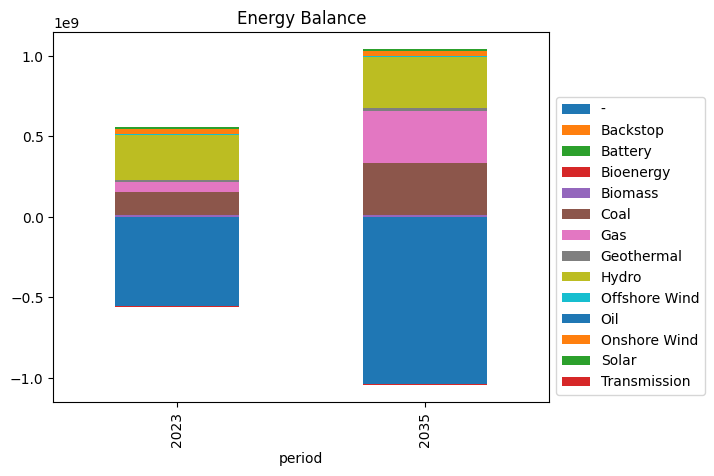

In [8]:
fig, ax = plt.subplots()

# Group by carrier and sum across components/bus_carrier
n.statistics.energy_balance().groupby("carrier").sum().T.plot(
    kind="bar", stacked=True, ax=ax, title="Energy Balance"
)

# Adjust legend
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
plt.show()